In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("D:/MPS ANALYTICS/Data Mining/Final Project/train.csv")

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\4198350755.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/MPS ANALYTICS/Data Mining/Final Project/train.csv")


In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income                object
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                  object
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment       object
changed_credit_limit         object
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt             object
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly      object
payment_behaviour            object
monthly_balance              object
credit_score                

In [8]:
df['annual_income'] = df['annual_income'].str.replace(r'[^0-9.]', '', regex=True)
df['annual_income'] = pd.to_numeric(df['annual_income'])

df['num_of_loan'] = df['num_of_loan'].str.replace(r'[^0-9.]', '', regex=True)
df['num_of_loan'] = pd.to_numeric(df['num_of_loan'])

df['num_of_delayed_payment'] = df['num_of_delayed_payment'].str.replace(r'[^0-9.]', '', regex=True)
df['num_of_delayed_payment'] = pd.to_numeric(df['num_of_delayed_payment'])

df['changed_credit_limit'] = df['changed_credit_limit'].str.replace(r'[^0-9.]', '', regex=True)
df['changed_credit_limit'] = pd.to_numeric(df['changed_credit_limit'])

df['outstanding_debt'] = df['outstanding_debt'].str.replace(r'[^0-9.]', '', regex=True)
df['outstanding_debt'] = pd.to_numeric(df['outstanding_debt'])

df['amount_invested_monthly'] = df['amount_invested_monthly'].str.replace(r'[^0-9.]', '', regex=True)
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'])

df['monthly_balance'] = df['monthly_balance'].str.replace(r'[^0-9.]', '', regex=True)
df['monthly_balance'] = pd.to_numeric(df['monthly_balance'], errors='coerce', downcast='float')

In [9]:
df.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float32
credit_score                

In [10]:
df.shape

(100000, 28)

In [11]:
df.isnull().sum()

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit         2091
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              2868
credit_score                    0
dtype: int64

In [12]:
df.describe()

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.465678,27.754251,1426.220376,32.285173,1403.118217,637.412998,3.088580e+22
std,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.670732,193.177339,1155.129026,5.116875,8306.041270,2043.319327,inf
min,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,7.759665e-03
25%,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700037e+02
50%,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.364770e+02
75%,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696852e+02
max,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,3.333333e+26


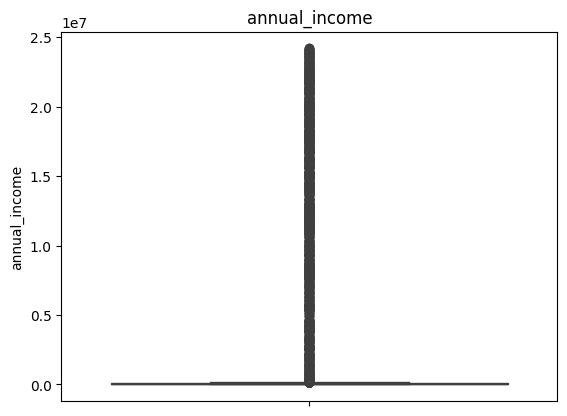

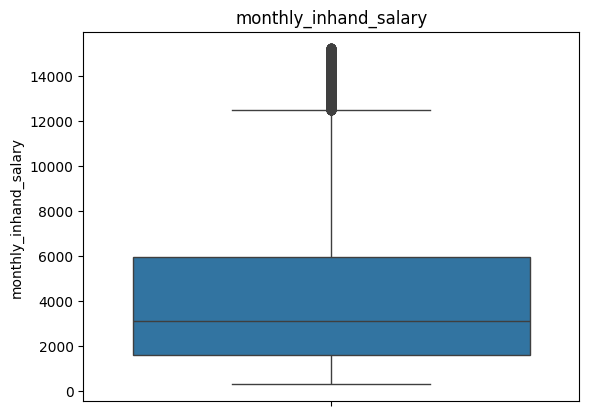

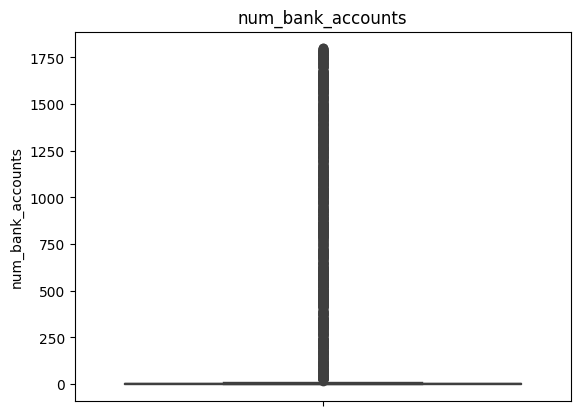

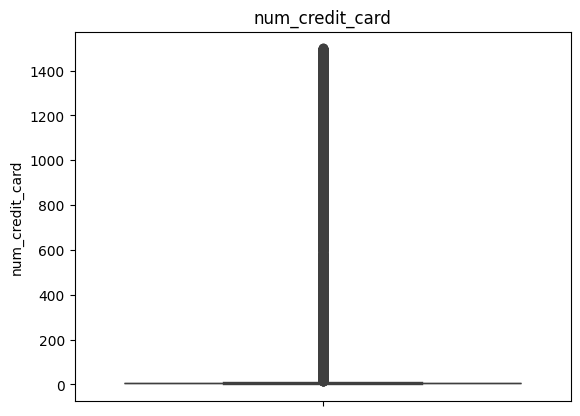

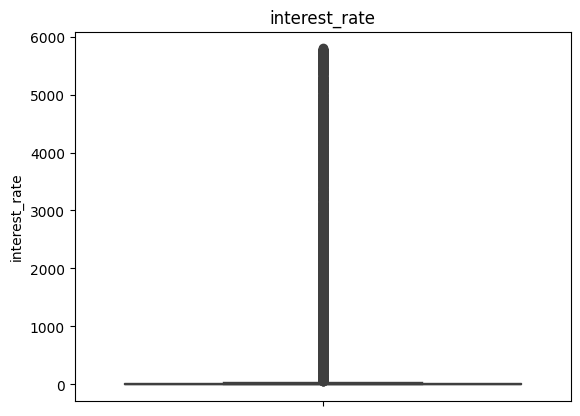

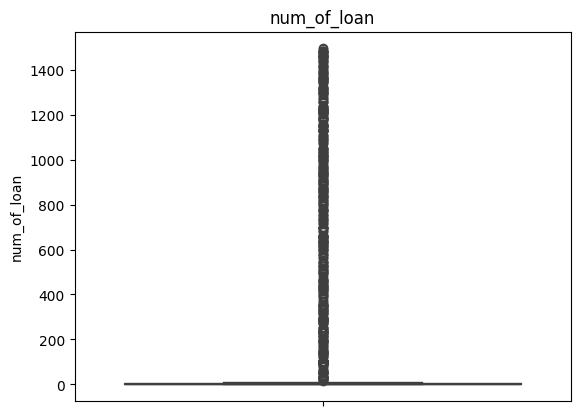

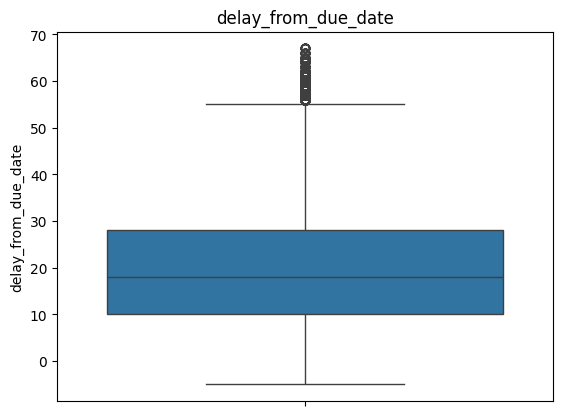

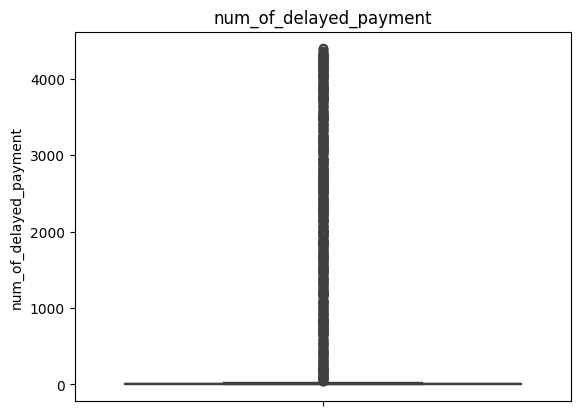

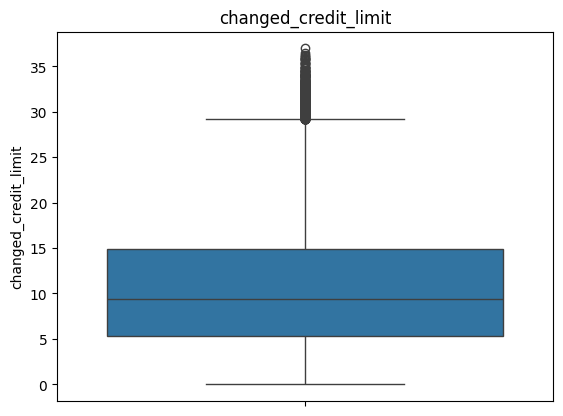

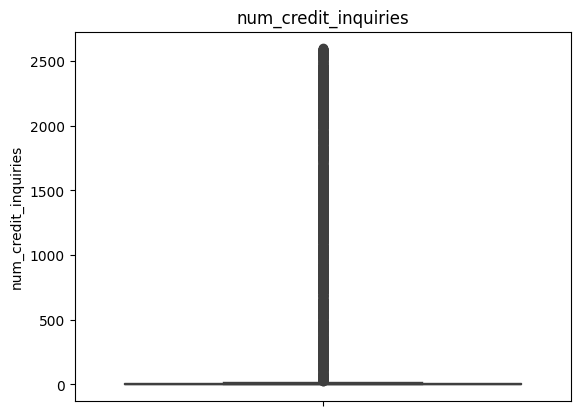

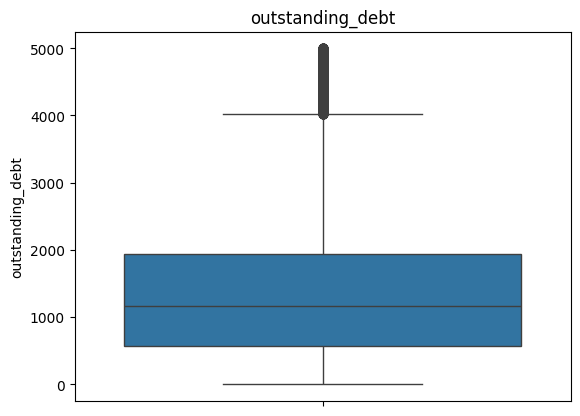

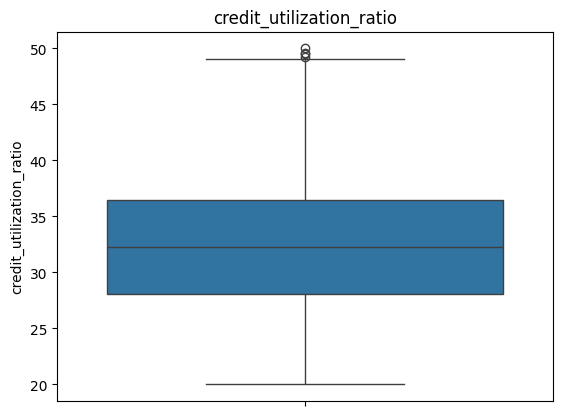

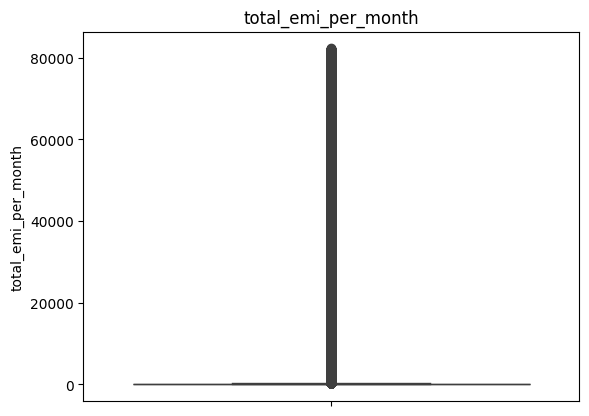

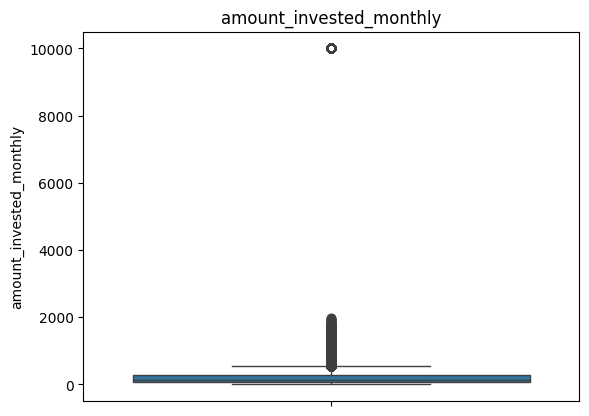

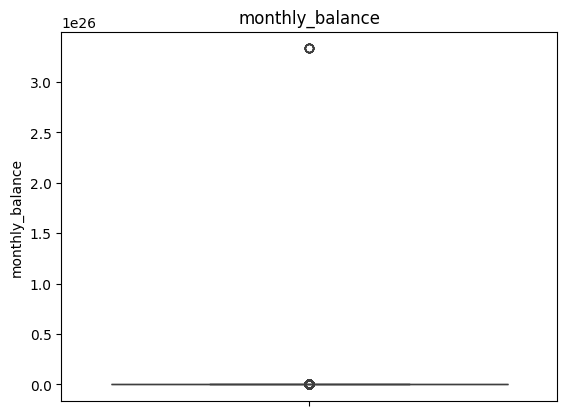

In [13]:
for i in df.select_dtypes(exclude=['object']):
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

#### Filling the Missing Values

In [14]:
df.monthly_inhand_salary.fillna(df['monthly_inhand_salary'].mode()[0], inplace=True)
df.num_of_delayed_payment.fillna(df['num_of_delayed_payment'].mode()[0], inplace=True)
df.changed_credit_limit.fillna(df['changed_credit_limit'].mode()[0], inplace=True)
df.num_credit_inquiries.fillna(df['num_credit_inquiries'].mode()[0], inplace=True)
df.amount_invested_monthly.fillna(df['amount_invested_monthly'].mode()[0], inplace=True)
df.monthly_balance.fillna(df['monthly_balance'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary           0
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment          0
changed_credit_limit            0
num_credit_inquiries            0
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly         0
payment_behaviour               0
monthly_balance                 0
credit_score                    0
dtype: int64

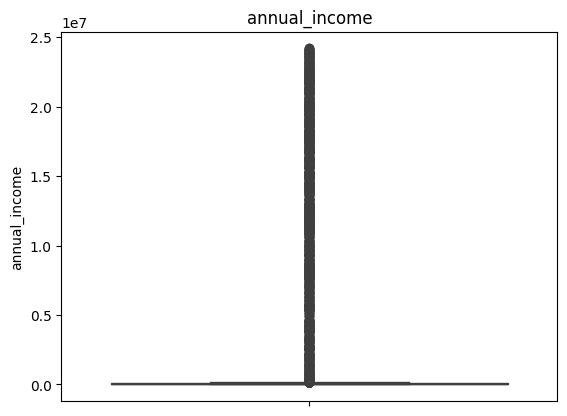

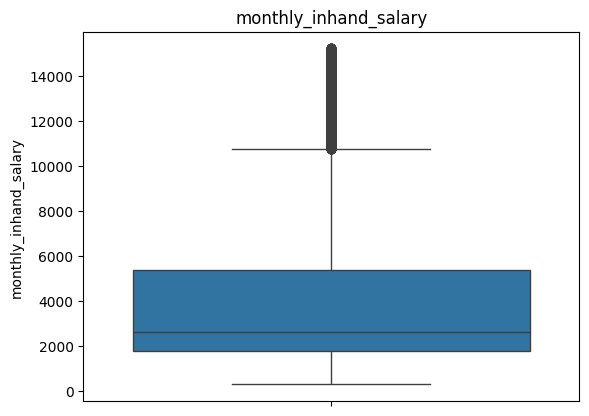

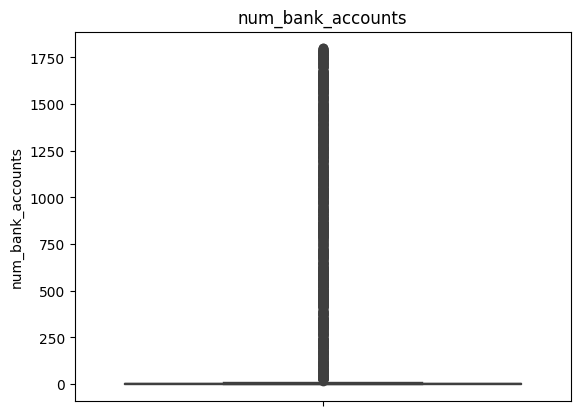

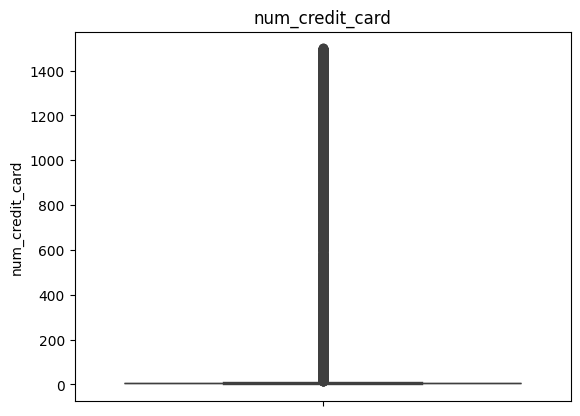

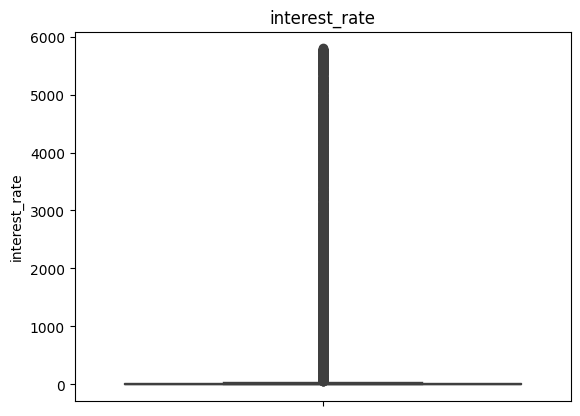

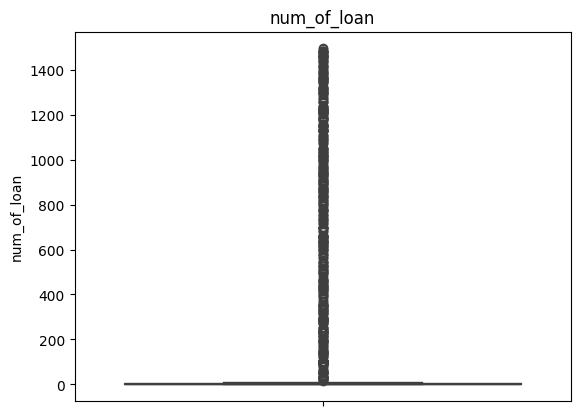

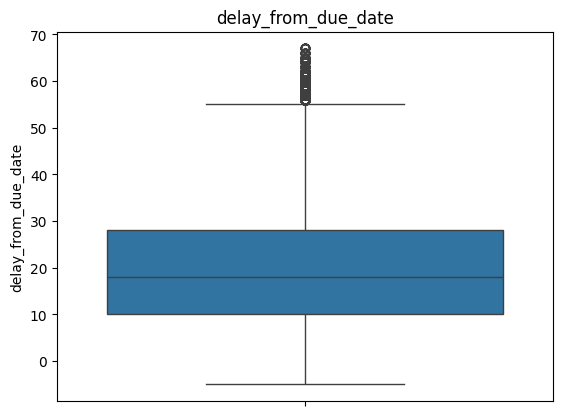

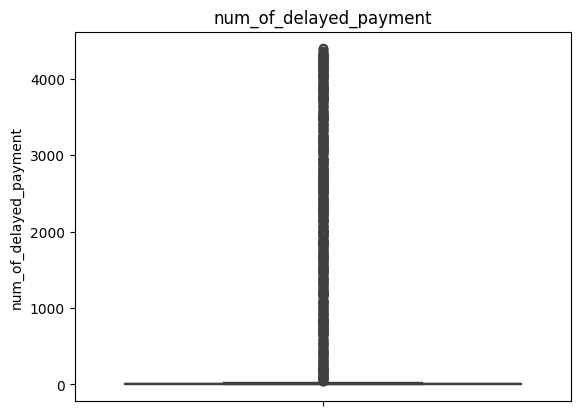

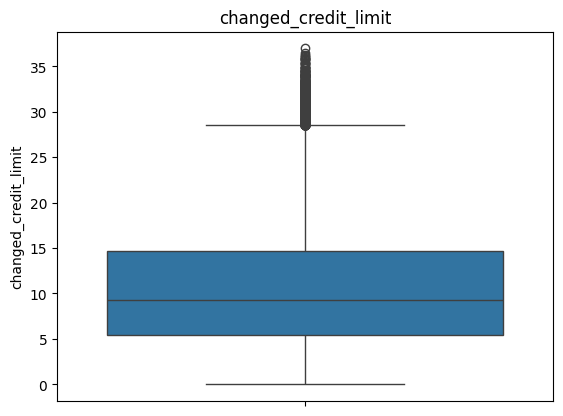

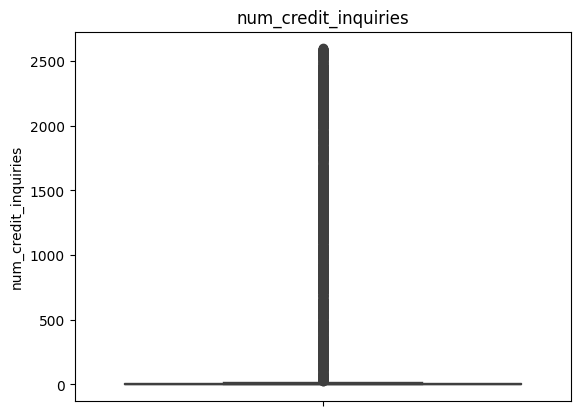

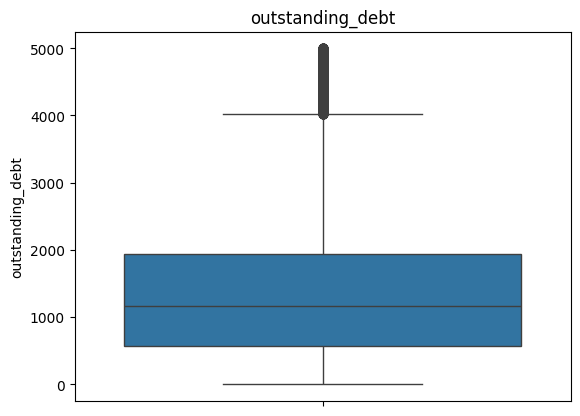

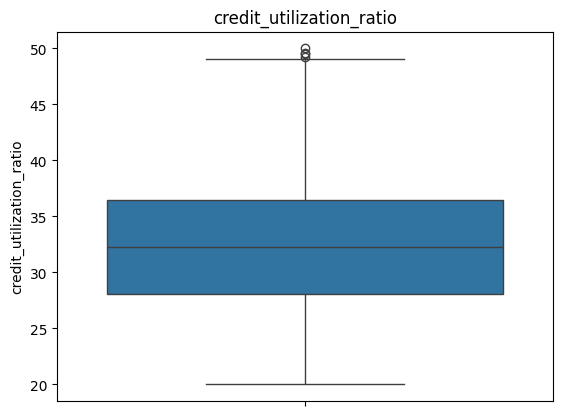

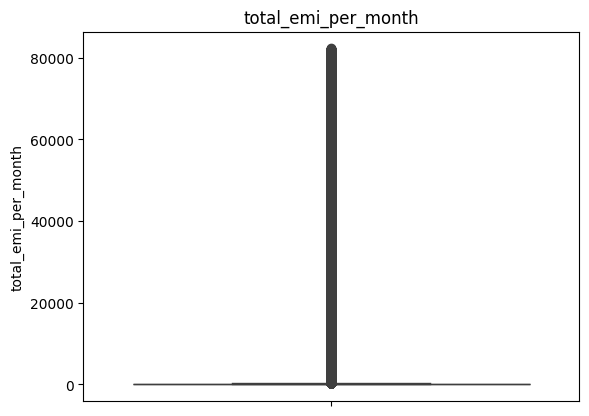

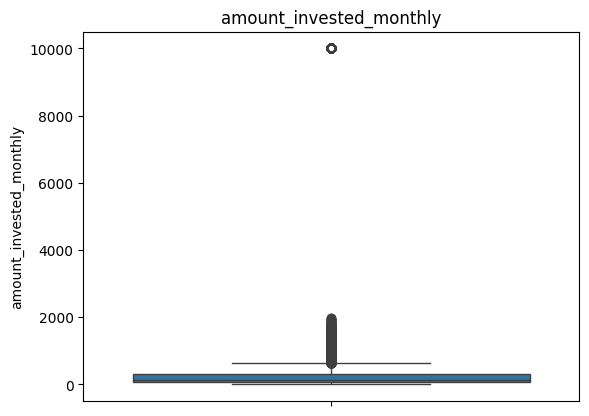

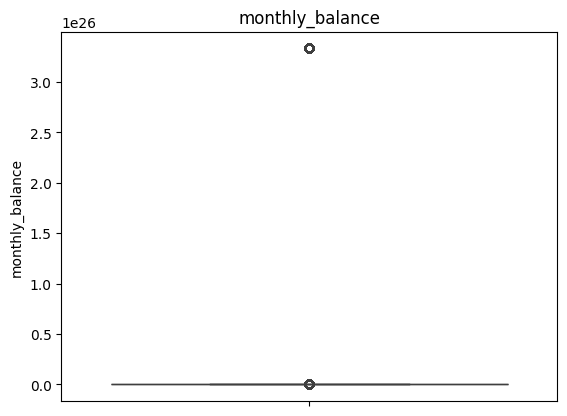

In [16]:
for i in df.select_dtypes(exclude=['object']):
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

#### Removing Outliers

In [17]:
q1ai = df.annual_income.quantile(0.25)
q3ai = df.annual_income.quantile(0.75)
iqrai = q3ai - q1ai
ulai = q3ai + (1.5 * iqrai)
llai = q3ai - (1.5 * iqrai)
print(f"annual_income - Q1: {q1ai}, Q3: {q3ai}, IQR: {iqrai}, Upper Limit: {ulai}, Lower Limit: {llai}")

q1mis = df.monthly_inhand_salary.quantile(0.25)
q3mis = df.monthly_inhand_salary.quantile(0.75)
iqrmis = q3mis - q1mis
ulmis = q3mis + (1.5 * iqrmis)
llmis = q3mis - (1.5 * iqrmis)
print(f"monthly_inhand_salary - Q1: {q1mis}, Q3: {q3mis}, IQR: {iqrmis}, Upper Limit: {ulmis}, Lower Limit: {llmis}")

q1nba = df.num_bank_accounts.quantile(0.25)
q3nba = df.num_bank_accounts.quantile(0.75)
iqrnba = q3nba - q1nba
ulnba = q3nba + (1.5 * iqrnba)
llnba = q3nba - (1.5 * iqrnba)
print(f"num_bank_accounts - Q1: {q1nba}, Q3: {q3nba}, IQR: {iqrnba}, Upper Limit: {ulnba}, Lower Limit: {llnba}")

q1ncc = df.num_credit_card.quantile(0.25)
q3ncc = df.num_credit_card.quantile(0.75)
iqrncc = q3ncc - q1ncc
ulncc = q3ncc + (1.5 * iqrncc)
llncc = q3ncc - (1.5 * iqrncc)
print(f"num_credit_card - Q1: {q1ncc}, Q3: {q3ncc}, IQR: {iqrncc}, Upper Limit: {ulncc}, Lower Limit: {llncc}")

q1ir = df.interest_rate.quantile(0.25)
q3ir = df.interest_rate.quantile(0.75)
iqrir = q3ir - q1ir
ulir = q3ir + (1.5 * iqrir)
llir = q3ir - (1.5 * iqrir)
print(f"interest_rate - Q1: {q1ir}, Q3: {q3ir}, IQR: {iqrir}, Upper Limit: {ulir}, Lower Limit: {llir}")

q1nol = df.num_of_loan.quantile(0.25)
q3nol = df.num_of_loan.quantile(0.75)
iqrnol = q3nol - q1nol
ulnol = q3nol + (1.5 * iqrnol)
llnol = q3nol - (1.5 * iqrnol)
print(f"num_of_loan - Q1: {q1nol}, Q3: {q3nol}, IQR: {iqrnol}, Upper Limit: {ulnol}, Lower Limit: {llnol}")

q1ddd = df.delay_from_due_date.quantile(0.25)
q3ddd = df.delay_from_due_date.quantile(0.75)
iqrddd = q3ddd - q1ddd
ulddd = q3ddd + (1.5 * iqrddd)
llddd = q3ddd - (1.5 * iqrddd)
print(f"delay_from_due_date - Q1: {q1ddd}, Q3: {q3ddd}, IQR: {iqrddd}, Upper Limit: {ulddd}, Lower Limit: {llddd}")

q1ndp = df.num_of_delayed_payment.quantile(0.25)
q3ndp = df.num_of_delayed_payment.quantile(0.75)
iqrndp = q3ndp - q1ndp
ulndp = q3ndp + (1.5 * iqrndp)
llndp = q3ndp - (1.5 * iqrndp)
print(f"num_of_delayed_payment - Q1: {q1ndp}, Q3: {q3ndp}, IQR: {iqrndp}, Upper Limit: {ulndp}, Lower Limit: {llndp}")

q1ccl = df.changed_credit_limit.quantile(0.25)
q3ccl = df.changed_credit_limit.quantile(0.75)
iqrccl = q3ccl - q1ccl
ulccl = q3ccl + (1.5 * iqrccl)
llccl = q3ccl - (1.5 * iqrccl)
print(f"changed_credit_limit - Q1: {q1ccl}, Q3: {q3ccl}, IQR: {iqrccl}, Upper Limit: {ulccl}, Lower Limit: {llccl}")

q1nci = df.num_credit_inquiries.quantile(0.25)
q3nci = df.num_credit_inquiries.quantile(0.75)
iqrnci = q3nci - q1nci
ulnci = q3nci + (1.5 * iqrnci)
llnci = q3nci - (1.5 * iqrnci)
print(f"num_credit_inquiries - Q1: {q1nci}, Q3: {q3nci}, IQR: {iqrnci}, Upper Limit: {ulnci}, Lower Limit: {llnci}")

q1temi = df.total_emi_per_month.quantile(0.25)
q3temi = df.total_emi_per_month.quantile(0.75)
iqrtemi = q3temi - q1temi
ultemi = q3temi + (1.5 * iqrtemi)
lltemi = q3temi - (1.5 * iqrtemi)
print(f"total_emi_per_month - Q1: {q1temi}, Q3: {q3temi}, IQR: {iqrtemi}, Upper Limit: {ultemi}, Lower Limit: {lltemi}")

q1aim = df.amount_invested_monthly.quantile(0.25)
q3aim = df.amount_invested_monthly.quantile(0.75)
iqraim = q3aim - q1aim
ulaim = q3aim + (1.5 * iqraim)
llaim = q3aim - (1.5 * iqraim)
print(f"amount_invested_monthly - Q1: {q1aim}, Q3: {q3aim}, IQR: {iqraim}, Upper Limit: {ulaim}, Lower Limit: {llaim}")

q1mb = df.monthly_balance.quantile(0.25)
q3mb = df.monthly_balance.quantile(0.75)
iqrmb = q3mb - q1mb
ulmb = q3mb + (1.5 * iqrmb)
llmb = q3mb - (1.5 * iqrmb)
print(f"monthly_balance - Q1: {q1mb}, Q3: {q3mb}, IQR: {iqrmb}, Upper Limit: {ulmb}, Lower Limit: {llmb}")

annual_income - Q1: 19457.5, Q3: 72790.92, IQR: 53333.42, Upper Limit: 152791.05, Lower Limit: -7209.210000000006
monthly_inhand_salary - Q1: 1792.0841666666665, Q3: 5371.5250000000015, IQR: 3579.440833333335, Upper Limit: 10740.686250000004, Lower Limit: 2.3637499999986176
num_bank_accounts - Q1: 3.0, Q3: 7.0, IQR: 4.0, Upper Limit: 13.0, Lower Limit: 1.0
num_credit_card - Q1: 4.0, Q3: 7.0, IQR: 3.0, Upper Limit: 11.5, Lower Limit: 2.5
interest_rate - Q1: 8.0, Q3: 20.0, IQR: 12.0, Upper Limit: 38.0, Lower Limit: 2.0
num_of_loan - Q1: 2.0, Q3: 6.0, IQR: 4.0, Upper Limit: 12.0, Lower Limit: 0.0
delay_from_due_date - Q1: 10.0, Q3: 28.0, IQR: 18.0, Upper Limit: 55.0, Lower Limit: 1.0
num_of_delayed_payment - Q1: 9.0, Q3: 19.0, IQR: 10.0, Upper Limit: 34.0, Lower Limit: 4.0
changed_credit_limit - Q1: 5.43, Q3: 14.66, IQR: 9.23, Upper Limit: 28.505000000000003, Lower Limit: 0.8149999999999995
num_credit_inquiries - Q1: 3.0, Q3: 9.0, IQR: 6.0, Upper Limit: 18.0, Lower Limit: 0.0
total_emi_pe

In [18]:
df_filtered = df[((df['annual_income'] <= ulai) & (df['annual_income'] >= llai)) &
                 ((df['monthly_inhand_salary'] <= ulmis) & (df['monthly_inhand_salary'] >= llmis)) &
                 ((df['num_bank_accounts'] <= ulnba) & (df['num_bank_accounts'] >= llnba)) &
                 ((df['num_credit_card'] <= ulncc) & (df['num_credit_card'] >= llncc)) &
                 ((df['interest_rate'] <= ulir) & (df['interest_rate'] >= llir)) &
                 ((df['num_of_loan'] <= ulnol) & (df['num_of_loan'] >= llnol)) &
                 ((df['delay_from_due_date'] <= ulddd) & (df['delay_from_due_date'] >= llddd)) &
                 ((df['num_of_delayed_payment'] <= ulndp) & (df['num_of_delayed_payment'] >= llndp)) &
                 ((df['changed_credit_limit'] <= ulccl) & (df['changed_credit_limit'] >= llccl)) &
                 ((df['num_credit_inquiries'] <= ulnci) & (df['num_credit_inquiries'] >= llnci)) &
                 ((df['total_emi_per_month'] <= ultemi) & (df['total_emi_per_month'] >= lltemi)) &
                 ((df['amount_invested_monthly'] <= ulaim) & (df['amount_invested_monthly'] >= llaim)) &
                 ((df['monthly_balance'] <= ulmb) & (df['monthly_balance'] >= llmb))]

In [19]:
df_filtered.shape

(50203, 28)

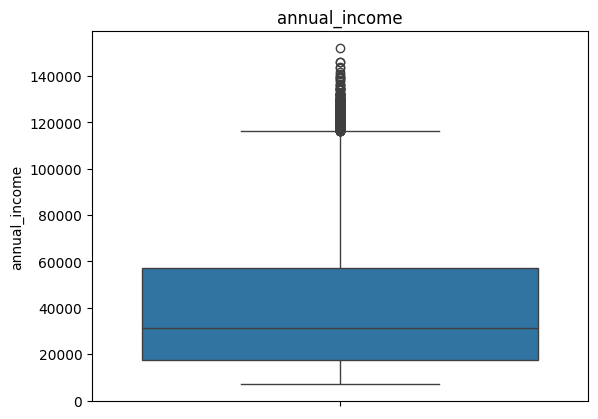

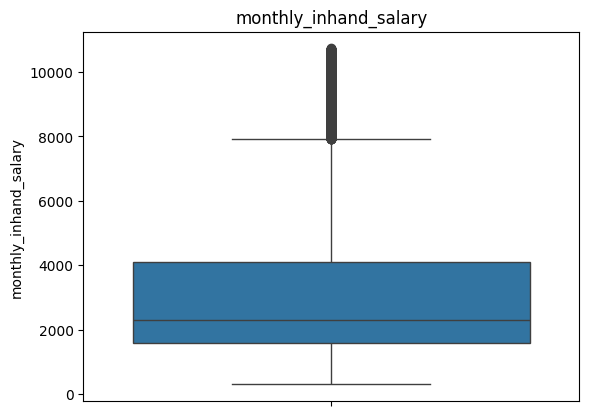

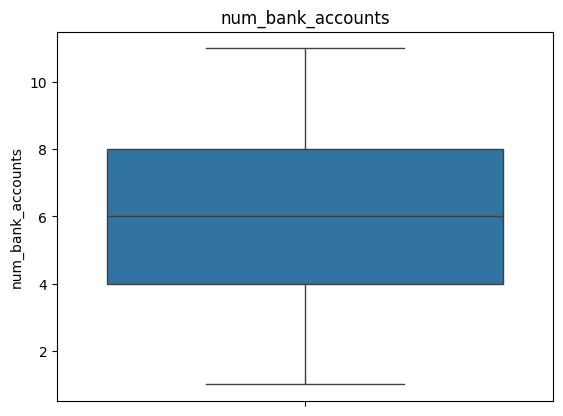

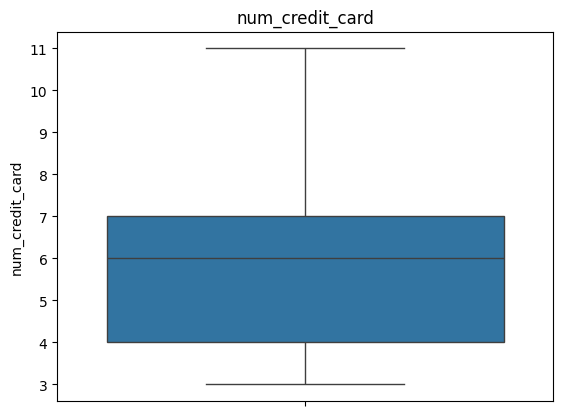

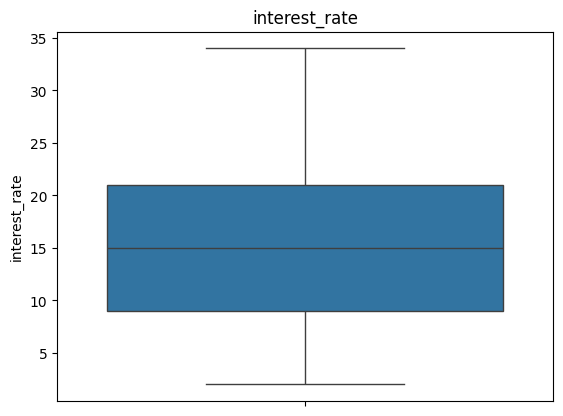

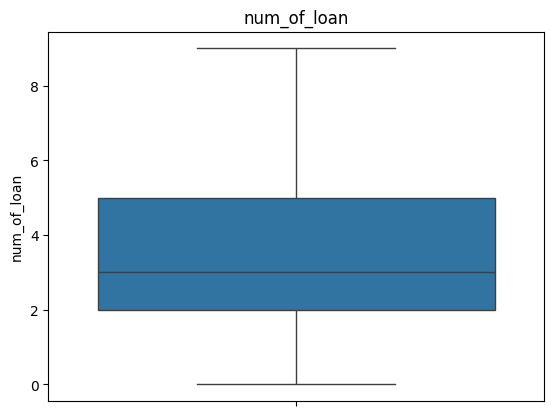

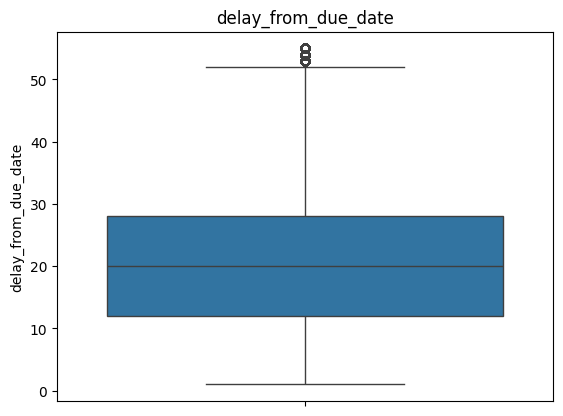

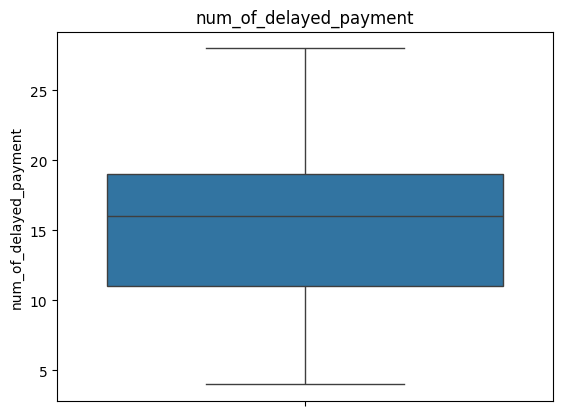

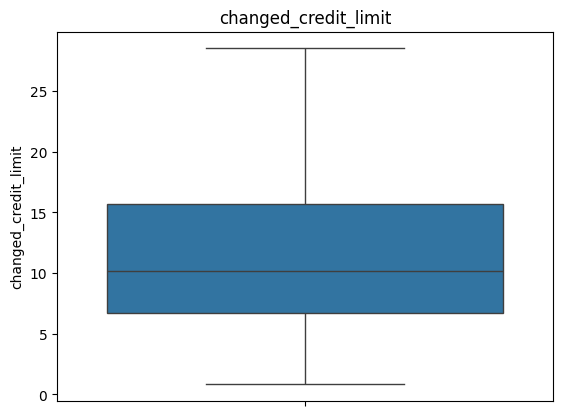

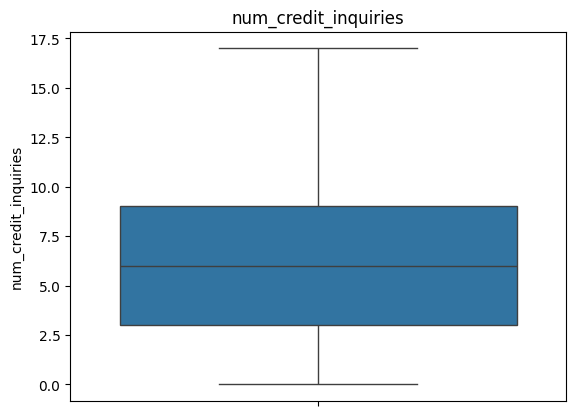

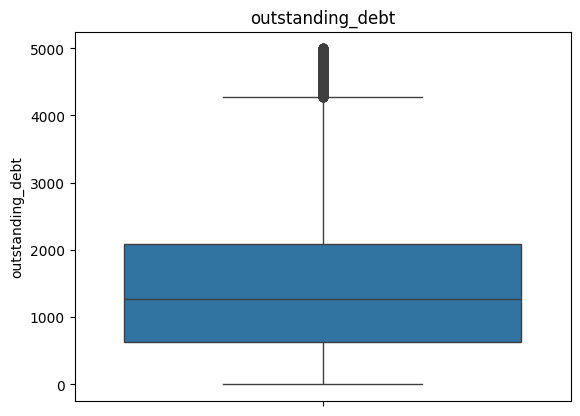

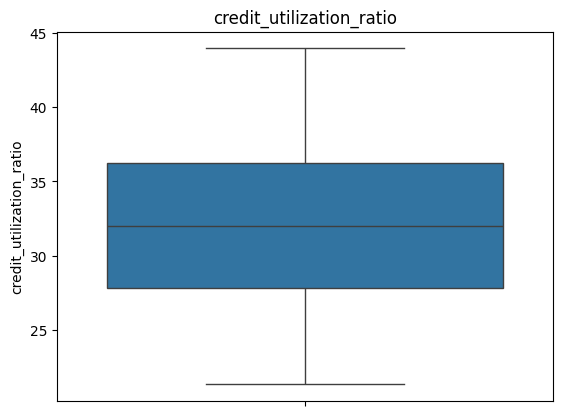

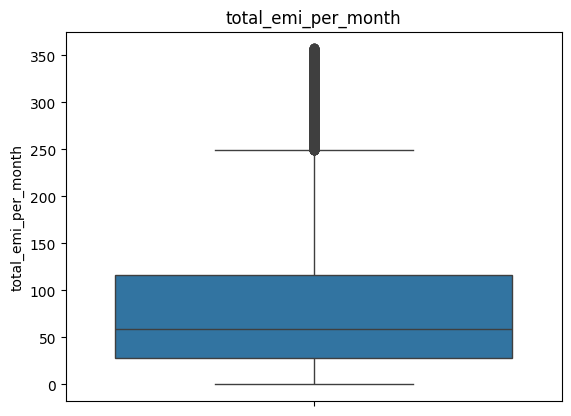

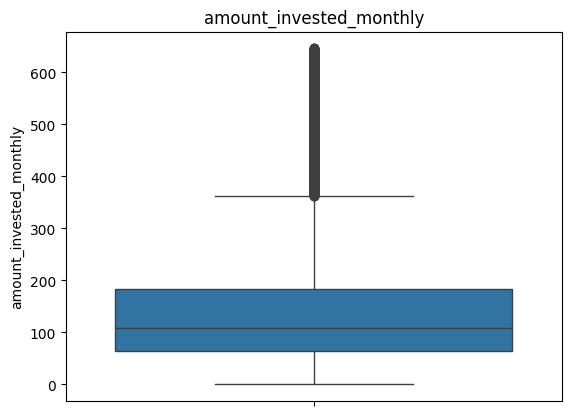

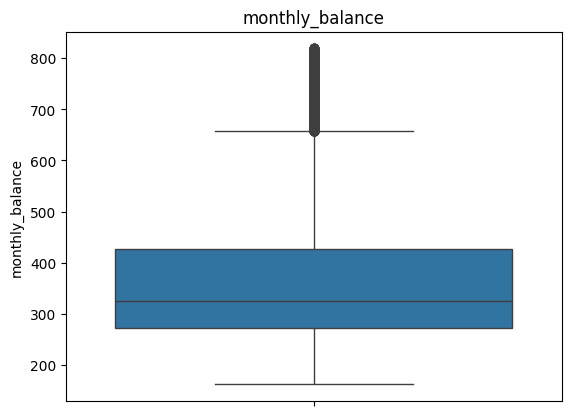

In [20]:
for i in df_filtered.select_dtypes(exclude=['object']):
        sns.boxplot(df_filtered[i])
        plt.title(i)
        plt.show()

In [21]:
df_filtered.isnull().sum()

id                             0
customer_id                    0
month                          0
name                        4979
age                            0
ssn                            0
occupation                     0
annual_income                  0
monthly_inhand_salary          0
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
type_of_loan                4571
delay_from_due_date            0
num_of_delayed_payment         0
changed_credit_limit           0
num_credit_inquiries           0
credit_mix                     0
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          4620
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly        0
payment_behaviour              0
monthly_balance                0
credit_score                   0
dtype: int64

#### EDA

In [22]:
df_filtered.describe()

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000,50203.000000
mean,38750.565323,3084.322739,5.929466,5.785112,15.953927,3.721411,21.842001,15.160966,11.126047,6.222317,1496.427327,32.028531,83.485776,143.448883,366.460266
std,26978.318615,2094.642411,2.213781,1.917701,8.301719,2.373049,12.700885,5.025116,6.221529,3.778328,1147.622696,4.987173,76.802379,115.273269,136.197845
min,7005.930000,303.645417,1.000000,3.000000,2.000000,0.000000,1.000000,4.000000,0.820000,0.000000,0.560000,21.359116,0.000000,0.000000,162.396866
25%,17442.090000,1572.565000,4.000000,4.000000,9.000000,2.000000,12.000000,11.000000,6.690000,3.000000,631.120000,27.845935,28.212459,63.530359,271.808578
50%,31135.370000,2295.058333,6.000000,6.000000,15.000000,3.000000,20.000000,16.000000,10.130000,6.000000,1263.910000,32.020190,58.729471,109.240357,325.828857
75%,56971.500000,4108.705000,8.000000,7.000000,21.000000,5.000000,28.000000,19.000000,15.710000,9.000000,2089.580000,36.240836,116.660196,183.290556,425.924301
max,151854.560000,10726.722500,11.000000,11.000000,34.000000,9.000000,55.000000,28.000000,28.500000,17.000000,4998.070000,43.947467,357.406068,646.374922,819.068604


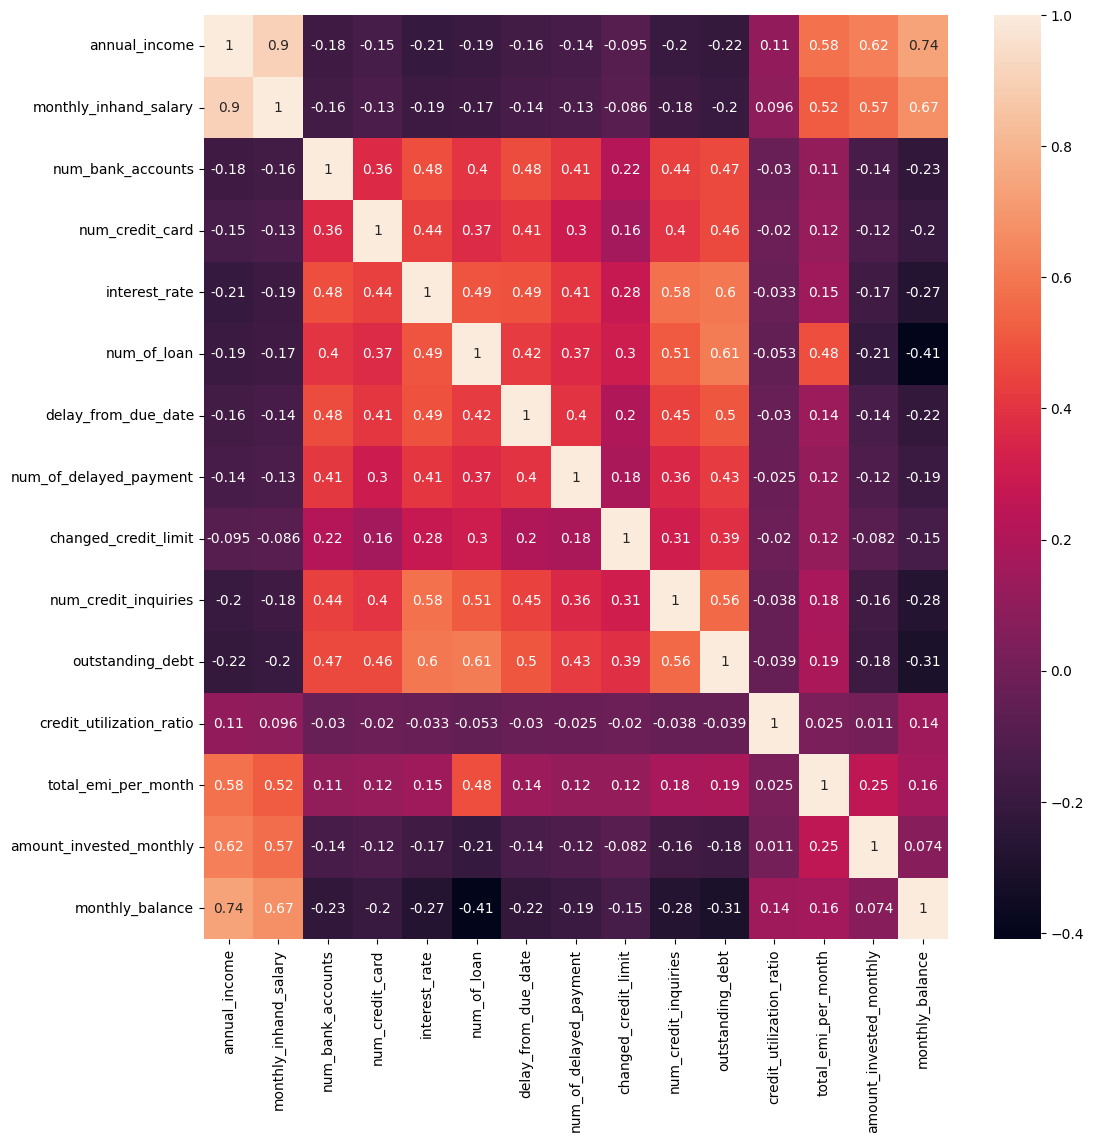

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(df_filtered.corr(), annot=True)
plt.show()

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


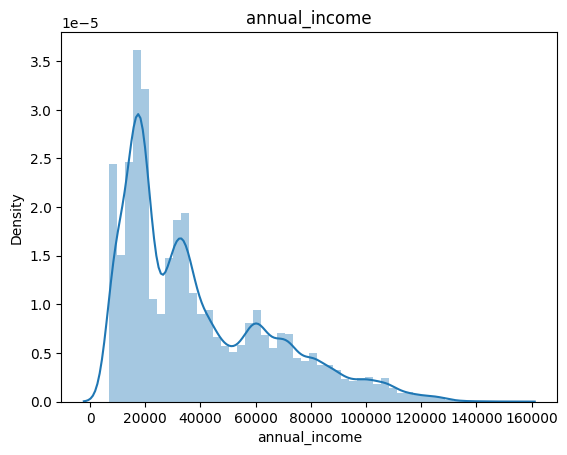

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


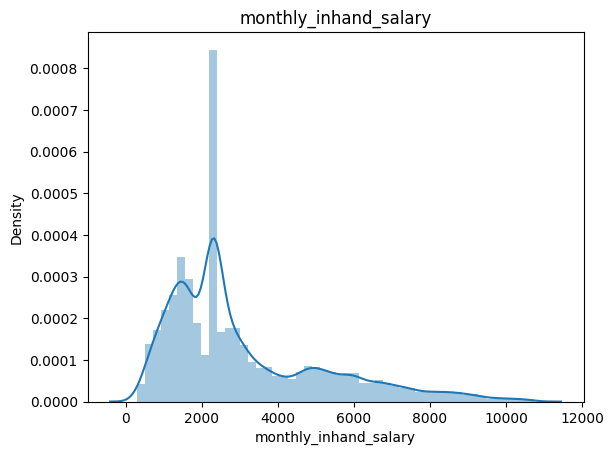

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


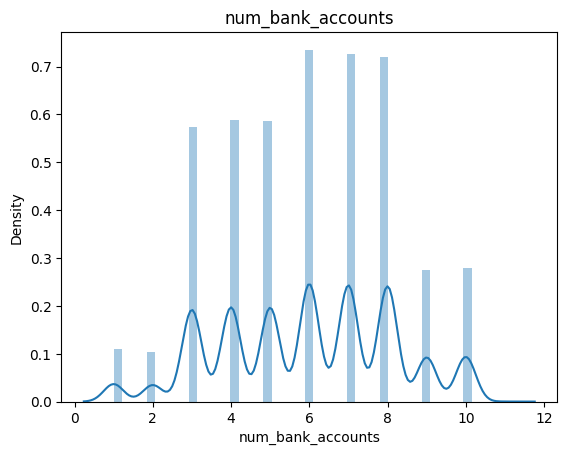

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


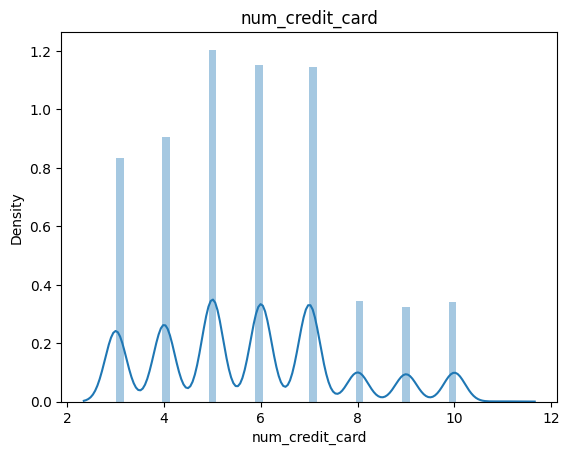

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


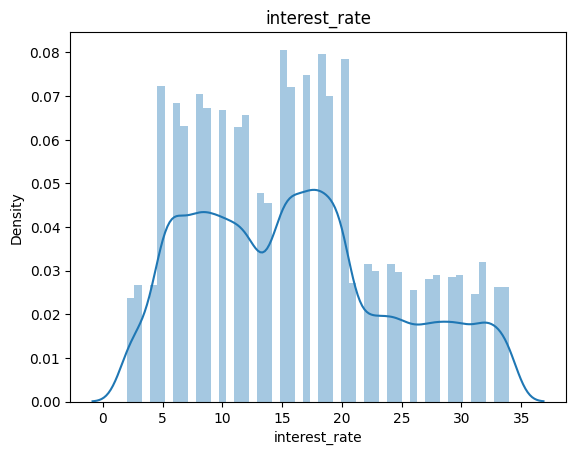

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


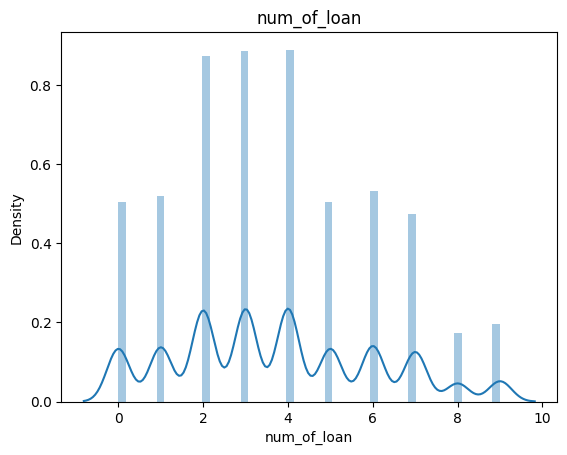

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


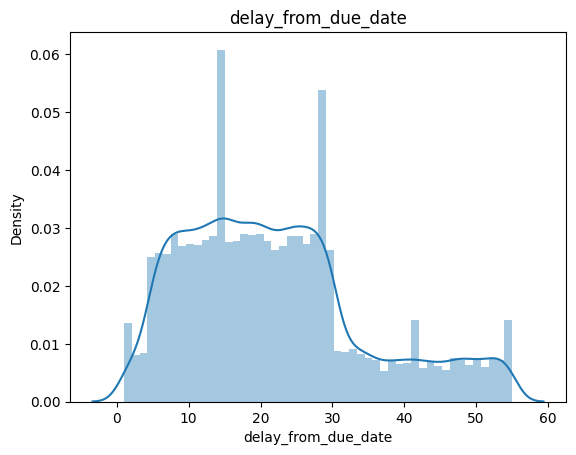

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


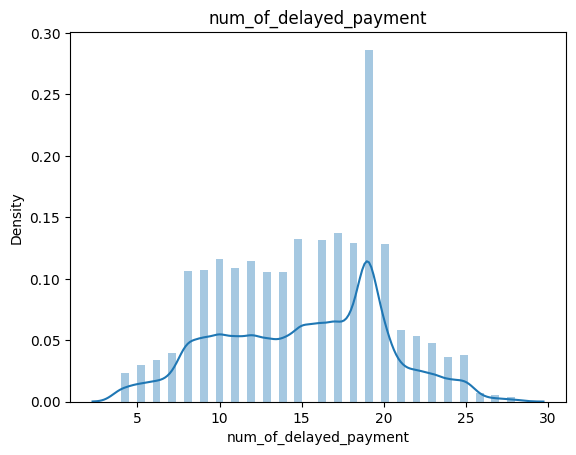

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


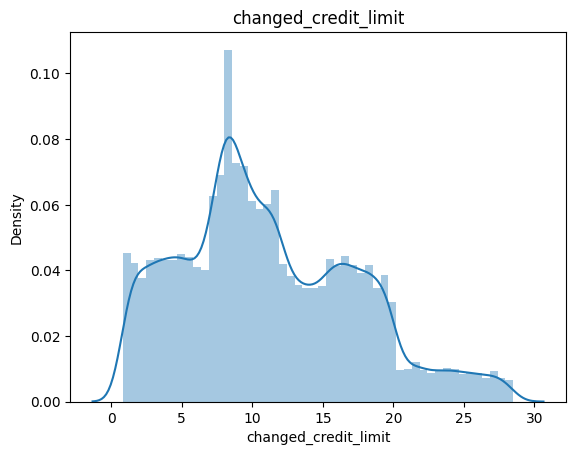

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


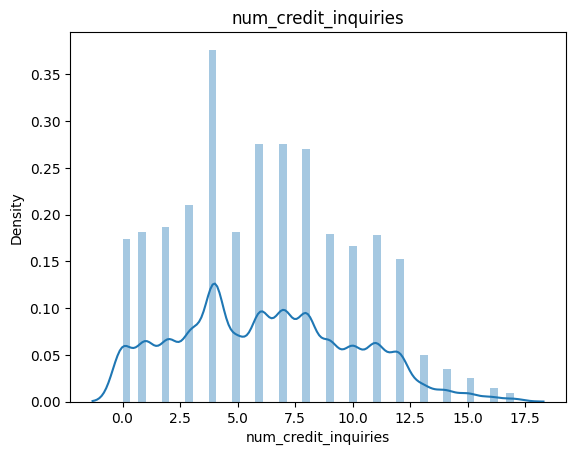

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


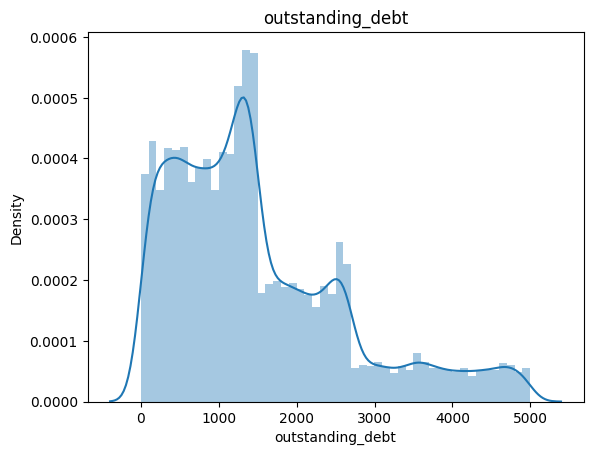

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


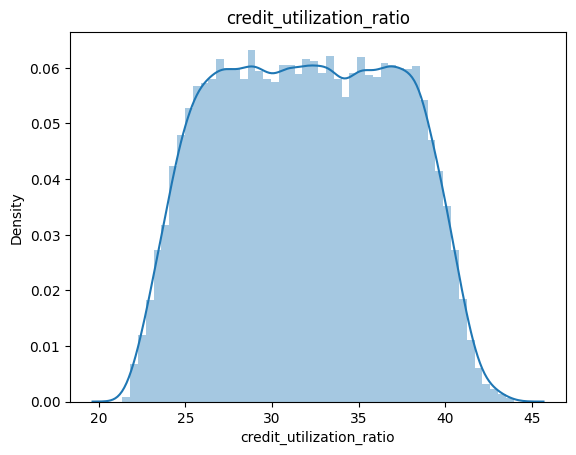

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


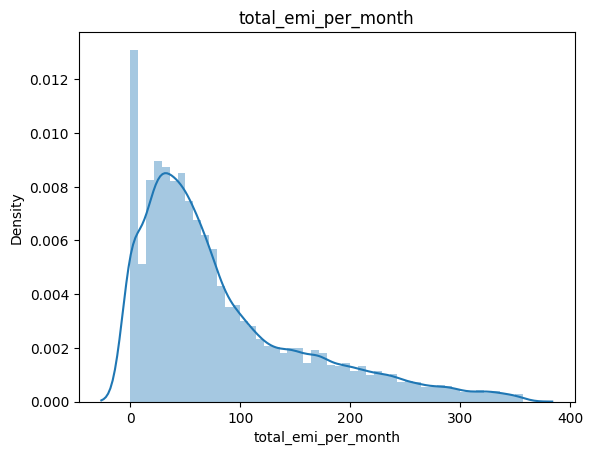

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


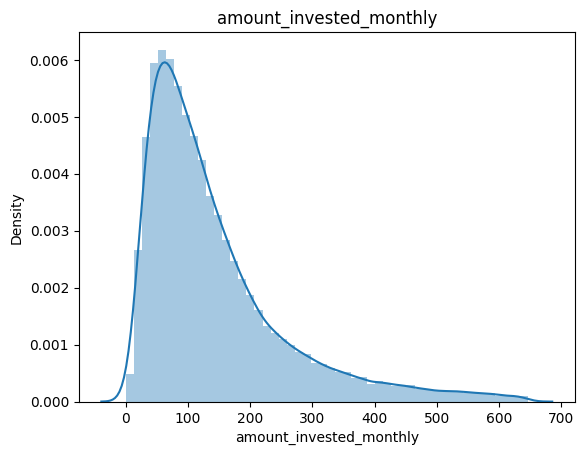

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\450080635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered[i])


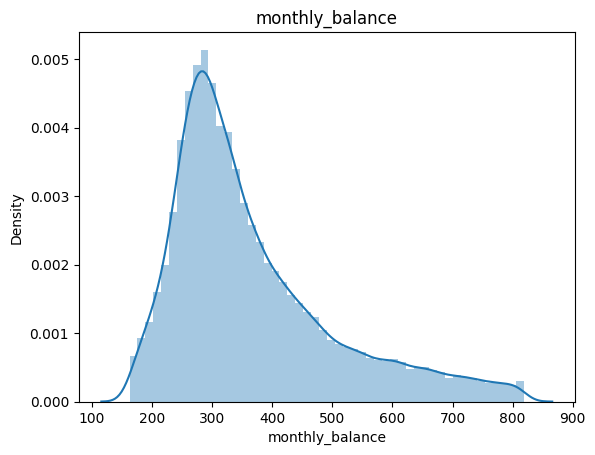

In [24]:
for i in df_filtered.select_dtypes(exclude=['object']):
        sns.distplot(df_filtered[i])
        plt.title(i)
        plt.show()

 #### Modelling

Removing the unnecessary columns and applying encoding techniques for the categorical variables

In [25]:
# df_filtered.drop(columns=['id','customer_id','name','ssn'],inplace=True, axis=1)

# df_filtered['age'] = df_filtered['age'].str.replace(r'[^0-9.]', '', regex=True)
# df_filtered['age'] = pd.to_numeric(df_filtered['age'])

print(df_filtered.dtypes)
df_filtered.head()

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float32
credit_score                

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494080,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,2295.058333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209869,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,2295.058333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451309,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489227,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,2295.058333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479218,Good


In [26]:
import re
def convert_to_months(duration):
    if not isinstance(duration, str):
        return None
        
    years = re.search(r'(\d+)\s*Years?', duration)
    months = re.search(r'(\d+)\s*Months?', duration)

    years = int(years.group(1)) if years else 0
    months = int(months.group(1)) if months else 0

    total_months = (years * 12) + months
    return total_months

df_filtered['total_months'] = df_filtered['credit_history_age'].apply(convert_to_months)
df_filtered['total_months'].head()

C:\Users\gandh\AppData\Local\Temp\ipykernel_20120\2413336998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_months'] = df_filtered['credit_history_age'].apply(convert_to_months)


0    265.0
2    267.0
3    268.0
4    269.0
5    270.0
Name: total_months, dtype: float64

In [27]:
df_filtered['credit_mix'].head()

0       _
2    Good
3    Good
4    Good
5    Good
Name: credit_mix, dtype: object

In [28]:
df_filtered.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float32
credit_score                

In [29]:
print('Month {}'.format(df_filtered['month'].nunique()))
print('occupation {}'.format(df_filtered['occupation'].nunique()))
print('type_of_loan {}'.format(df_filtered['type_of_loan'].nunique()))
print('credit_mix {}'.format(df_filtered['credit_mix'].unique()))
print('payment_of_min_amount {}'.format(df_filtered['payment_of_min_amount'].unique()))
print('payment_behaviour {}'.format(df_filtered['payment_behaviour'].unique()))
print('credit_score {}'.format(df_filtered['credit_score'].unique()))
print('credit_score {}'.format(df_filtered['credit_score'].unique()))

Month 8
occupation 16
type_of_loan 5262
credit_mix ['_' 'Good' 'Standard' 'Bad']
payment_of_min_amount ['No' 'NM' 'Yes']
payment_behaviour ['High_spent_Small_value_payments' 'Low_spent_Medium_value_payments'
 'Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 '!@9#%8' 'Low_spent_Large_value_payments'
 'High_spent_Large_value_payments']
credit_score ['Good' 'Standard' 'Poor']
credit_score ['Good' 'Standard' 'Poor']


#### one hot encoding

In [30]:
# month, occupation, payment of min amount
df_ohe = pd.get_dummies(df_filtered, columns=['month', 'occupation', 'payment_of_min_amount'],drop_first=True)
df_ohe.dtypes

id                            object
customer_id                   object
name                          object
age                           object
ssn                           object
annual_income                float64
monthly_inhand_salary        float64
num_bank_accounts              int64
num_credit_card                int64
interest_rate                  int64
num_of_loan                    int64
type_of_loan                  object
delay_from_due_date            int64
num_of_delayed_payment       float64
changed_credit_limit         float64
num_credit_inquiries         float64
credit_mix                    object
outstanding_debt             float64
credit_utilization_ratio     float64
credit_history_age            object
total_emi_per_month          float64
amount_invested_monthly      float64
payment_behaviour             object
monthly_balance              float32
credit_score                  object
total_months                 float64
month_August                   uint8
m

#### ordinal encoding

credit mix, credit score, payment behaviour

In [31]:
from sklearn.preprocessing import OrdinalEncoder

credit_mix_order = ['_', 'Bad', 'Standard', 'Good']
credit_score_order = ['Good', 'Standard', 'Poor']
payment_behaviour_order = ['High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments', 
                    'Low_spent_Small_value_payments','Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments','!@9#%8']

encoder = OrdinalEncoder(categories=[credit_mix_order, credit_score_order, payment_behaviour_order])

df_ohe[['credit_mix', 'credit_score', 'payment_behaviour']] = encoder.fit_transform(df_ohe[['credit_mix', 'credit_score', 'payment_behaviour']])


#### Catboost

In [133]:
# type of loan
!pip install category_encoders

     ---------------------------------------- 81.9/81.9 kB 4.5 MB/s eta 0:00:00


In [32]:
from category_encoders.cat_boost import CatBoostEncoder

cate = CatBoostEncoder()

df_ohe['type_of_loan'] = cate.fit_transform(df_ohe['type_of_loan'], df_ohe['credit_score'])

In [33]:
df_ohe.shape

(50203, 50)

In [34]:
df_ohe.dtypes

id                            object
customer_id                   object
name                          object
age                           object
ssn                           object
annual_income                float64
monthly_inhand_salary        float64
num_bank_accounts              int64
num_credit_card                int64
interest_rate                  int64
num_of_loan                    int64
type_of_loan                 float64
delay_from_due_date            int64
num_of_delayed_payment       float64
changed_credit_limit         float64
num_credit_inquiries         float64
credit_mix                   float64
outstanding_debt             float64
credit_utilization_ratio     float64
credit_history_age            object
total_emi_per_month          float64
amount_invested_monthly      float64
payment_behaviour            float64
monthly_balance              float32
credit_score                 float64
total_months                 float64
month_August                   uint8
m

#### Model Fitting

In [35]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=58, max_features=37)

In [120]:
df_ohe.dropna(inplace=True)
X = df_ohe.drop(['credit_history_age','credit_score', 'id', 'customer_id','name','age','ssn'], axis=1)
y = df_ohe['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

In [40]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=58, max_features=37)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train,dc.predict(X_train))

0.5176910574800047

In [42]:
predDc = dc.predict(X_test)
r2_score(y_test,predDc)

0.2329317445782767

#### Model 2

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=30,min_samples_leaf=5, max_features=33)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=33, min_samples_leaf=5)

In [44]:
r2_score(y_train,rf.predict(X_train))

0.5521416962314329

In [45]:
predR = rf.predict(X_test)
r2_score(y_test,predR)

0.4037604853001877

#### Model Tuning RandomForest

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_Model = RandomForestClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [48]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
439 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\anaconda\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [49]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 56}

In [50]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.741
Test Accuracy - : 0.735


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train,rf_Grid.predict(X_train)))
print(classification_report(y_test,rf_Grid.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3660
         1.0       0.73      0.87      0.80     20343
         2.0       0.76      0.75      0.75     11139

    accuracy                           0.74     35142
   macro avg       0.50      0.54      0.52     35142
weighted avg       0.66      0.74      0.70     35142

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1636
         1.0       0.73      0.87      0.79      8714
         2.0       0.76      0.74      0.75      4711

    accuracy                           0.74     15061
   macro avg       0.49      0.54      0.51     15061
weighted avg       0.66      0.74      0.69     15061



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1497: Undefine

#### Model Tuning Decision Tree

In [62]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,5,6,7,8,9]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


param_grid = { 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [63]:
dt_grid.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 5, 6, 7, 8, 9],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [64]:
dt_grid.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [65]:
print (f'Train Accuracy - : {dt_grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dt_grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.740
Test Accuracy - : 0.729


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_train,dt_grid.predict(X_train)))
print(classification_report(y_test,dt_grid.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.58      0.27      0.36      3660
         1.0       0.76      0.82      0.79     20343
         2.0       0.73      0.75      0.74     11139

    accuracy                           0.74     35142
   macro avg       0.69      0.61      0.63     35142
weighted avg       0.73      0.74      0.73     35142

              precision    recall  f1-score   support

         0.0       0.57      0.24      0.34      1636
         1.0       0.75      0.82      0.78      8714
         2.0       0.72      0.73      0.72      4711

    accuracy                           0.73     15061
   macro avg       0.68      0.60      0.62     15061
weighted avg       0.72      0.73      0.72     15061



In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,dt_grid.predict(X_test)))

[[ 399 1211   26]
 [ 242 7132 1340]
 [  61 1204 3446]]


In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_Grid.predict(X_test)))

[[   0 1635    1]
 [   0 7591 1123]
 [   0 1232 3479]]


## Scaling the attributes - Normalizing the Data

In [121]:
df_ohe.describe()

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,occupation________,payment_of_min_amount_No,payment_of_min_amount_Yes
count,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,...,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000
mean,38872.033689,3091.514642,5.927977,5.784660,15.939713,3.724227,1.185270,21.827977,15.161651,11.119156,...,0.057950,0.064719,0.060677,0.057536,0.062600,0.061651,0.061724,0.069662,0.250840,0.629778
std,27067.358292,2102.044401,2.213346,1.919168,8.309311,2.369312,0.327721,12.696729,5.036181,6.221107,...,0.233651,0.246032,0.238740,0.232867,0.242246,0.240523,0.240656,0.254579,0.433502,0.482870
min,7005.930000,303.645417,1.000000,3.000000,2.000000,0.000000,0.110021,1.000000,4.000000,0.820000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17482.490000,1576.815833,4.000000,4.000000,9.000000,2.000000,0.963712,12.000000,11.000000,6.690000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31163.355000,2295.058333,6.000000,6.000000,15.000000,3.000000,1.105113,20.000000,16.000000,10.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57227.040000,4129.770000,8.000000,7.000000,21.000000,5.000000,1.400787,28.000000,19.000000,15.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,151854.560000,10709.912500,11.000000,11.000000,34.000000,9.000000,1.943588,55.000000,28.000000,28.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [74]:
from sklearn.multiclass import OneVsRestClassifier

In [81]:
RF=OneVsRestClassifier(RandomForestClassifier(bootstrap=False,max_depth=4, max_features='sqrt',min_samples_leaf=1, min_samples_split=2, n_estimators=56))

RF.fit(X_train_norm, y_train)

print (f'Train Accuracy - : {RF.score(X_train_norm,y_train):.3f}')
print (f'Test Accuracy - : {RF.score(X_test_norm,y_test):.3f}')

Train Accuracy - : 0.738
Test Accuracy - : 0.730


In [85]:
print(classification_report(y_train,RF.predict(X_train_norm)))
print(classification_report(y_test,RF.predict(X_test_norm)))

              precision    recall  f1-score   support

         0.0       0.80      0.01      0.03      3660
         1.0       0.73      0.87      0.79     20343
         2.0       0.76      0.73      0.74     11139

    accuracy                           0.74     35142
   macro avg       0.76      0.54      0.52     35142
weighted avg       0.75      0.74      0.70     35142

              precision    recall  f1-score   support

         0.0       0.76      0.01      0.02      1636
         1.0       0.72      0.87      0.79      8714
         2.0       0.75      0.71      0.73      4711

    accuracy                           0.73     15061
   macro avg       0.74      0.53      0.52     15061
weighted avg       0.74      0.73      0.69     15061



In [109]:
print(confusion_matrix(y_test,RF.predict(X_test_norm)))

[[  19 1616    1]
 [   6 7617 1091]
 [   0 1350 3361]]


#### ROC and AUC Function for Multi Class Outcome Variable

In [96]:
from sklearn.metrics import roc_curve, auc

In [105]:
def plot_multiclass_roc_curve(true_y, y_prob, n_classes):
    # Binarize the output
    y_bin = label_binarize(y_test, classes=list(range(n_classes)))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC')
    plt.legend(loc="lower right")
    plt.show()

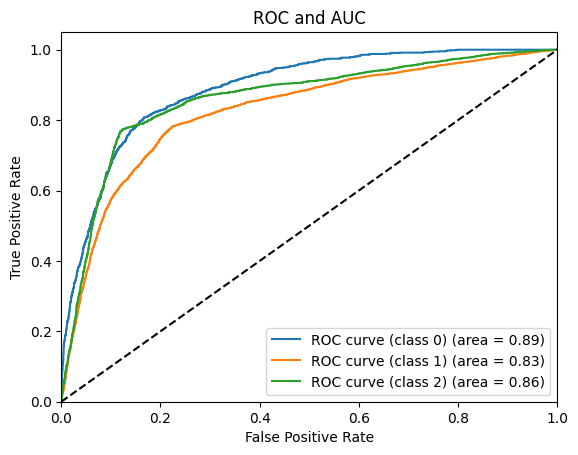

In [140]:
y_prob1 = RF.predict_proba(X_test_norm)

n_classes = len(np.unique(y_train))

plot_multiclass_roc_curve(y_test,y_prob1, n_classes)

### ROC Curve Decision Tree

In [99]:
DT=OneVsRestClassifier(DecisionTreeClassifier(max_depth=8, max_features='sqrt',min_samples_leaf=2, min_samples_split=2))

DT.fit(X_train_norm, y_train)

print (f'Train Accuracy - : {DT.score(X_train_norm,y_train):.3f}')
print (f'Test Accuracy - : {DT.score(X_test_norm,y_test):.3f}')

Train Accuracy - : 0.769
Test Accuracy - : 0.740


In [100]:
print(classification_report(y_train,DT.predict(X_train_norm)))
print(classification_report(y_test,DT.predict(X_test_norm)))

              precision    recall  f1-score   support

         0.0       0.58      0.47      0.52      3660
         1.0       0.80      0.84      0.82     20343
         2.0       0.76      0.74      0.75     11139

    accuracy                           0.77     35142
   macro avg       0.71      0.68      0.70     35142
weighted avg       0.76      0.77      0.77     35142

              precision    recall  f1-score   support

         0.0       0.58      0.45      0.50      1636
         1.0       0.79      0.80      0.79      8714
         2.0       0.70      0.74      0.72      4711

    accuracy                           0.74     15061
   macro avg       0.69      0.66      0.67     15061
weighted avg       0.74      0.74      0.74     15061



In [110]:
print(confusion_matrix(y_test,DT.predict(X_test_norm)))

[[ 732  816   88]
 [ 383 6935 1396]
 [ 158 1080 3473]]


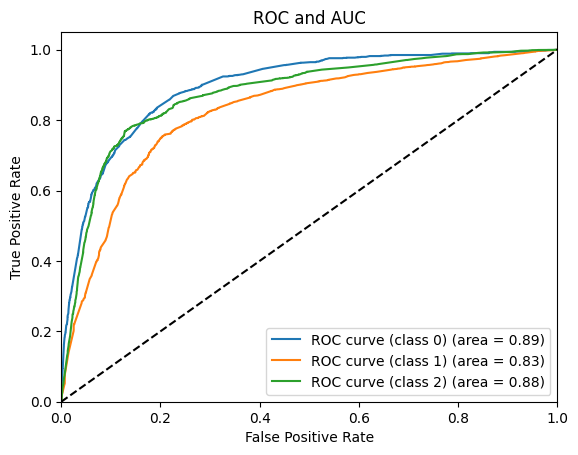

In [141]:
y_prob2 = DT.predict_proba(X_test_norm)

n_classes = len(np.unique(y_train))

plot_multiclass_roc_curve(y_test, y_prob2, n_classes)

#### Gradient Boosting Model

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb_Model = GradientBoostingClassifier()

In [125]:
gb_grid = GridSearchCV(estimator = gb_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
202 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\anaconda\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [126]:
gb_grid.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [128]:
print(classification_report(y_train,gb_grid.predict(X_train)))
print(classification_report(y_test,gb_grid.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.66      0.55      0.60      3056
         1.0       0.82      0.84      0.83     16678
         2.0       0.78      0.79      0.78      9015

    accuracy                           0.80     28749
   macro avg       0.75      0.73      0.74     28749
weighted avg       0.79      0.80      0.79     28749

              precision    recall  f1-score   support

         0.0       0.61      0.51      0.56      1330
         1.0       0.80      0.83      0.82      7048
         2.0       0.77      0.78      0.77      3943

    accuracy                           0.78     12321
   macro avg       0.73      0.70      0.71     12321
weighted avg       0.77      0.78      0.77     12321



In [131]:
print(confusion_matrix(y_test,GB.predict(X_test_norm)))

[[ 637  671   22]
 [ 322 5820  906]
 [  79  812 3052]]


In [129]:
GB=OneVsRestClassifier(GradientBoostingClassifier(max_depth=4, max_features='sqrt',min_samples_leaf=2, min_samples_split=2, n_estimators=80))

GB.fit(X_train_norm, y_train)

print (f'Train Accuracy - : {DT.score(X_train_norm,y_train):.3f}')
print (f'Test Accuracy - : {DT.score(X_test_norm,y_test):.3f}')

Train Accuracy - : 0.767
Test Accuracy - : 0.757


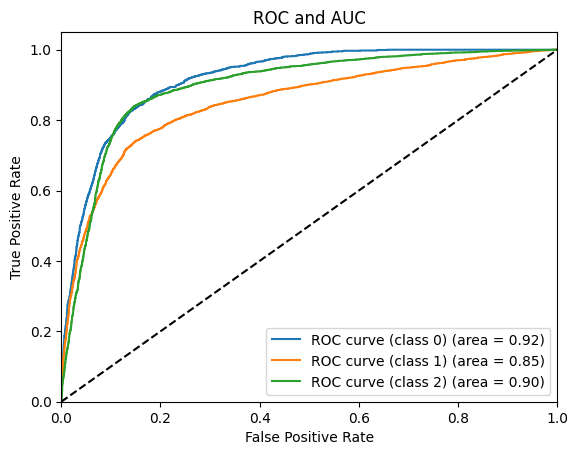

In [142]:
y_prob3 = GB.predict_proba(X_test_norm)

n_classes = len(np.unique(y_train))

plot_multiclass_roc_curve(y_test, y_prob3, n_classes)

In [ ]:
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgboost[i], tpr_xgboost[i], color=color, lw=2, linestyle='--',
             label='XGBoost ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_xgboost[i]))
    plt.plot(fpr_catboost[i], tpr_catboost[i], color=color, lw=2,
             label='CatBoost ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_catboost[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for XGBoost and CatBoost')
plt.legend(loc="lower right")
plt.show()

# Evaluate the models
xgb_y_pred = xgb_model.predict(X_test)
cat_y_pred = cat_model.predict(X_test)
y_test_labels = y_test

print("XGBoost Classification Report")
print(classification_report(y_test, xgb_y_pred))

print("CatBoost Classification Report")
print(classification_report(y_test, cat_y_pred))

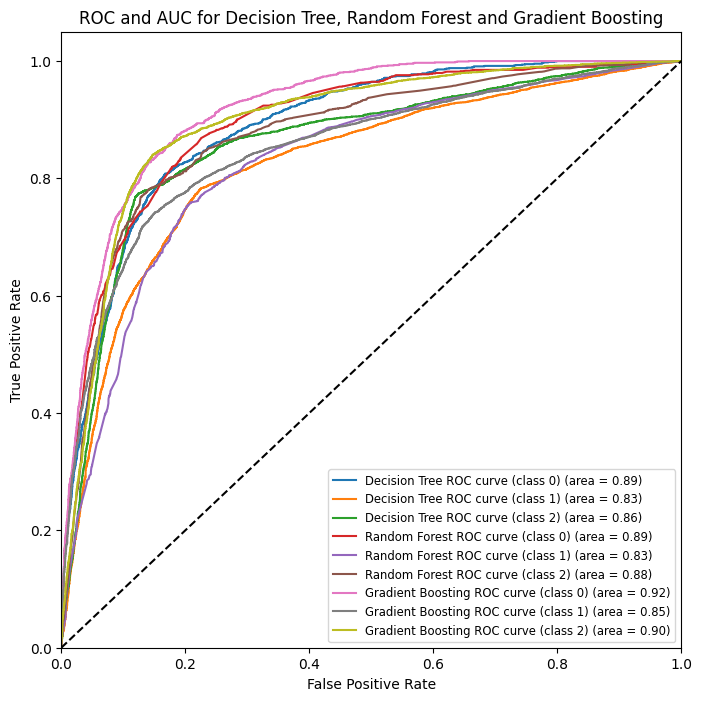

In [149]:
def plot_multiclass_roc_curve(true_y, model_probs, n_classes, model_names):
    """
    Plots the ROC and AUC for multiple models.

    Parameters:
    - true_y: array-like of shape (n_samples,) - True labels
    - model_probs: list of arrays - Each element is an array of shape (n_samples, n_classes) with the predicted probabilities for each model
    - n_classes: int - Number of classes
    - model_names: list of str - Names of the models
    """
    # Binarize the output
    y_bin = label_binarize(true_y, classes=list(range(n_classes)))
    
    plt.figure(figsize=(8,8))
    
    for idx, y_prob in enumerate(model_probs):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{model_names[idx]} ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC for Decision Tree, Random Forest and Gradient Boosting')
    plt.legend(loc="lower right",fontsize='small')
    plt.show()

# Example usage:
true_y = y_test
model_probs = [y_prob1, y_prob2, y_prob3]
n_classes = 3
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

plot_multiclass_roc_curve(true_y, model_probs, n_classes, model_names)
